# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

# Data and Library Importation

In [417]:
pip install plotnine 

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/eb/c1/fcc5985eee6511aa321e68c8f813d9fdbe1b506713a95d4f612a5f963270/plotnine-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.5 MB/s eta 0:00:00eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [508]:
# Importing the Libraries
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from scipy.stats import boxcox, shapiro, probplot
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
#import visuals as vs

%matplotlib inline   
from sklearn.preprocessing import QuantileTransformer                     

In [509]:
# Importing the Dataset
#try:
dataset = pd.read_csv("/Users/cegrib/Downloads/Wholesale_Data.csv")  
#dataset.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    #print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
#except:
   # print('Sorry! Dataset could not be loaded.')
    
dataset                        

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Data description

In [510]:
dataset.describe()                                

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [511]:
dataset.info()                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [512]:
#Check for nulls
dataset.isnull().sum()       

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No nulls found

In [513]:
#Print datatypes of each column
print("Data types:")
print(dataset.dtypes)        

Data types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [514]:
#Check for duplicates
print("Number of duplicate rows: ", dataset.duplicated().sum())        

Number of duplicate rows:  0


In [515]:
#Let´s convert the categorical variables to meaningful data

dataset.Region.value_counts()       

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [496]:
dataset.Region=dataset.Region.map({3:'Other',2:'Lisbon',1:'Oporto'})    

In [506]:
dataset.Channel.value_counts()    

Channel
1    298
2    142
Name: count, dtype: int64

In [461]:
dataset.Channel=dataset.Channel.map({1:'Horeca',2:'Retail'})    

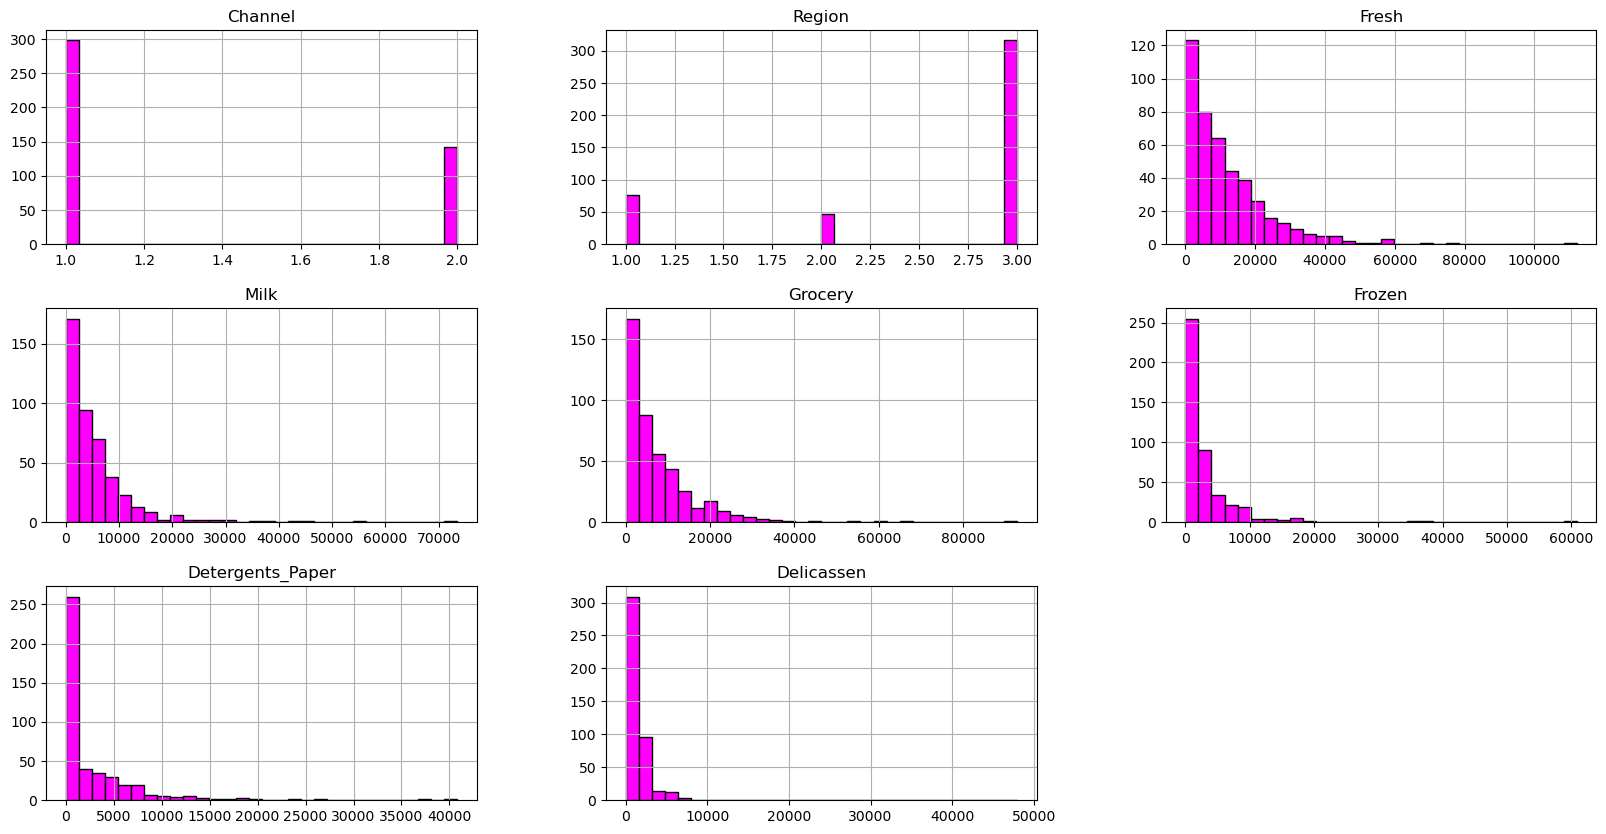

In [516]:
#Distribution of numeric variables

dataset.hist(figsize=(20,10),bins=30, color='magenta', edgecolor='black')
plt.show()          

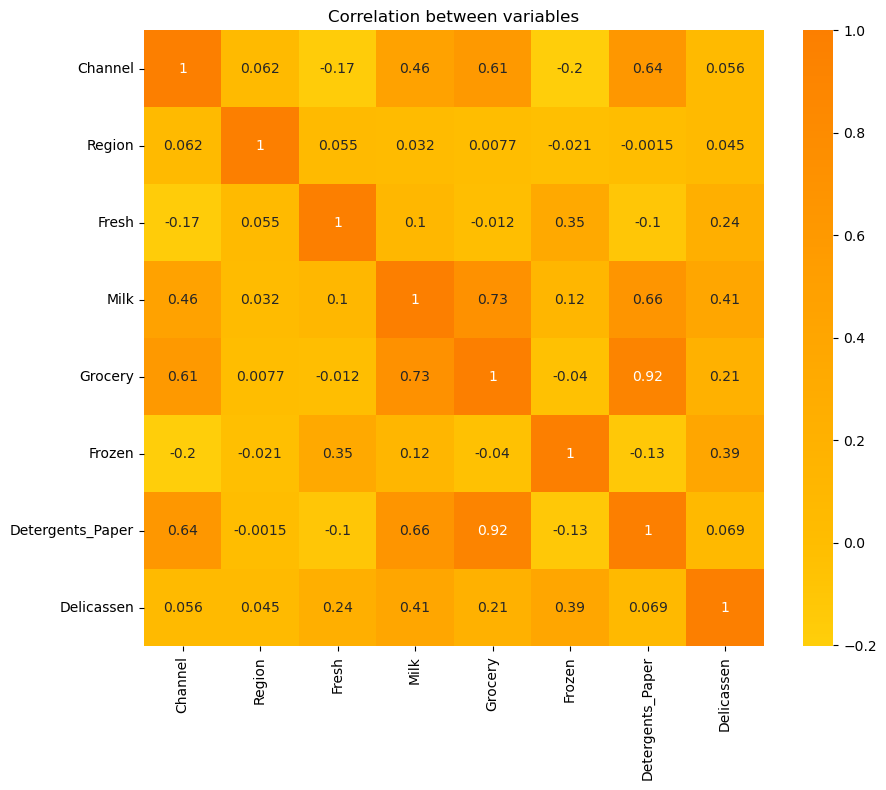

In [517]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='Wistia', center=0)
plt.title('Correlation between variables')
plt.show()         

# Outlier detection

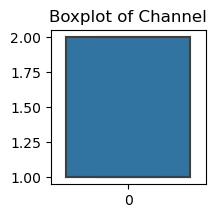

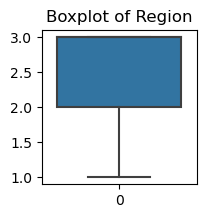

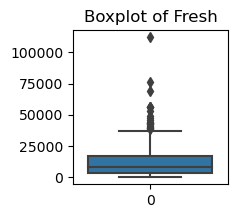

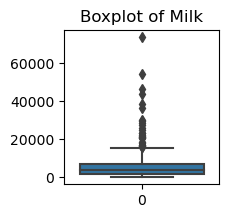

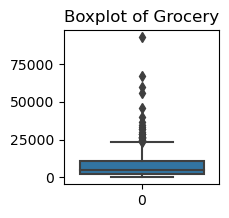

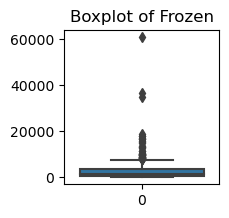

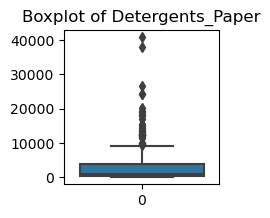

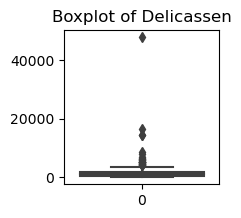

In [369]:
# checking for outliers
# Draw boxplots for all features
for column in dataset.columns:
    plt.figure(figsize=(2, 2))
    sns.boxplot(dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)                   

# Observations:

1. No missing values or duplicate rows
2. The means and stds of each feature vary, suggesting that the data spanses several orders of magnitude. This may not be good enough for machine learning models that are affected by the scale of input features. Scaling is recommended
3. Presence of outliers that can potentially skew the model
4. Variables such as 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' show a right skew (mean > median). This could impact the performance of some machine learning algorithms.
5. The dataset is skewed

In [518]:
# Detect and print number of outliers for each feature
for column in dataset.columns:
    outliers = detect_outliers(dataset, column)
    print(f'Number of outliers in {column}: {len(outliers)}')            

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


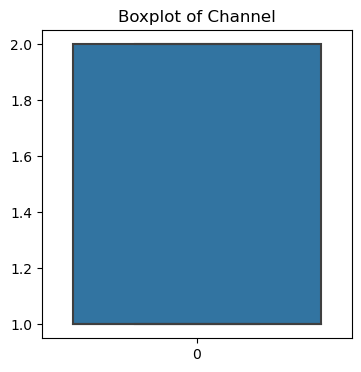

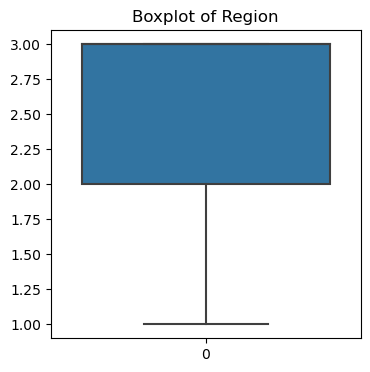

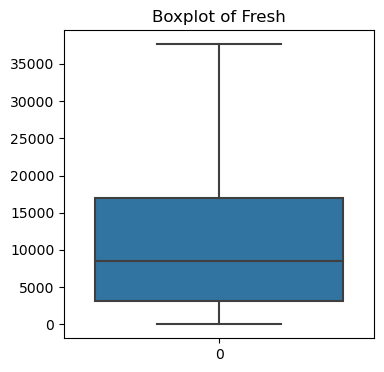

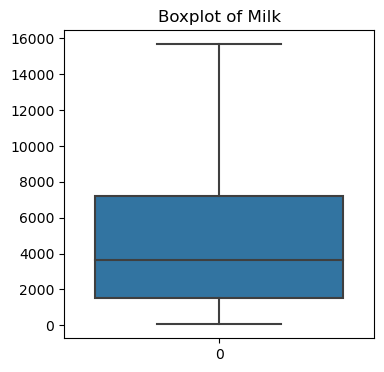

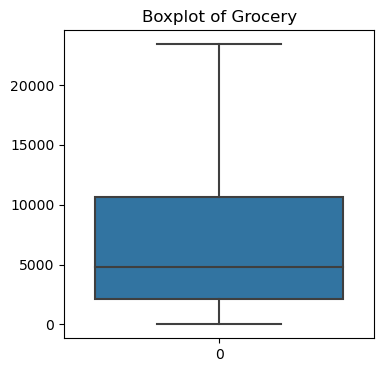

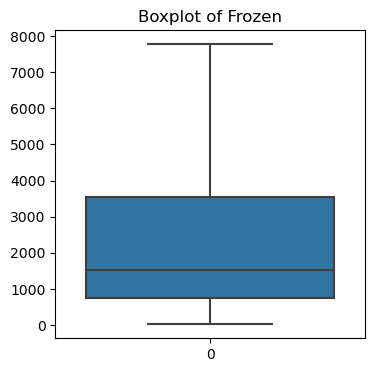

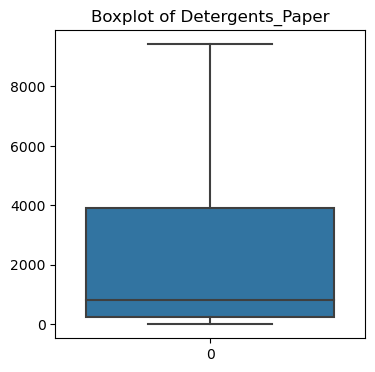

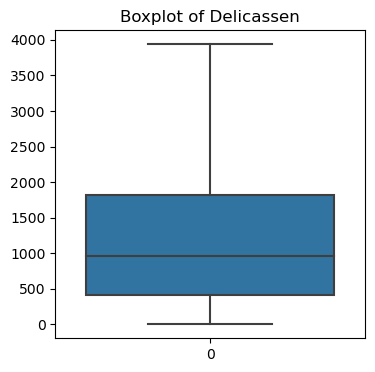

In [522]:
#Handle outliers
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in dataset.columns:
    handle_outliers(dataset, column) 
    
# Draw boxplots for all features
for column in dataset.columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()   
  

In [525]:
#We can also transform the dataset using the Box-Cox method:

data=dataset.copy()

lamb=[]
confidence=[]
for i in data.columns[2:]:
    data[i], coef, conf=boxcox(data[i]+0.0000001, alpha=0.05)   #We add a tiny constant as values need to be positive 
                                                                #for Box-Cox
    lamb.append(coef)
    confidence.append(conf)  

  

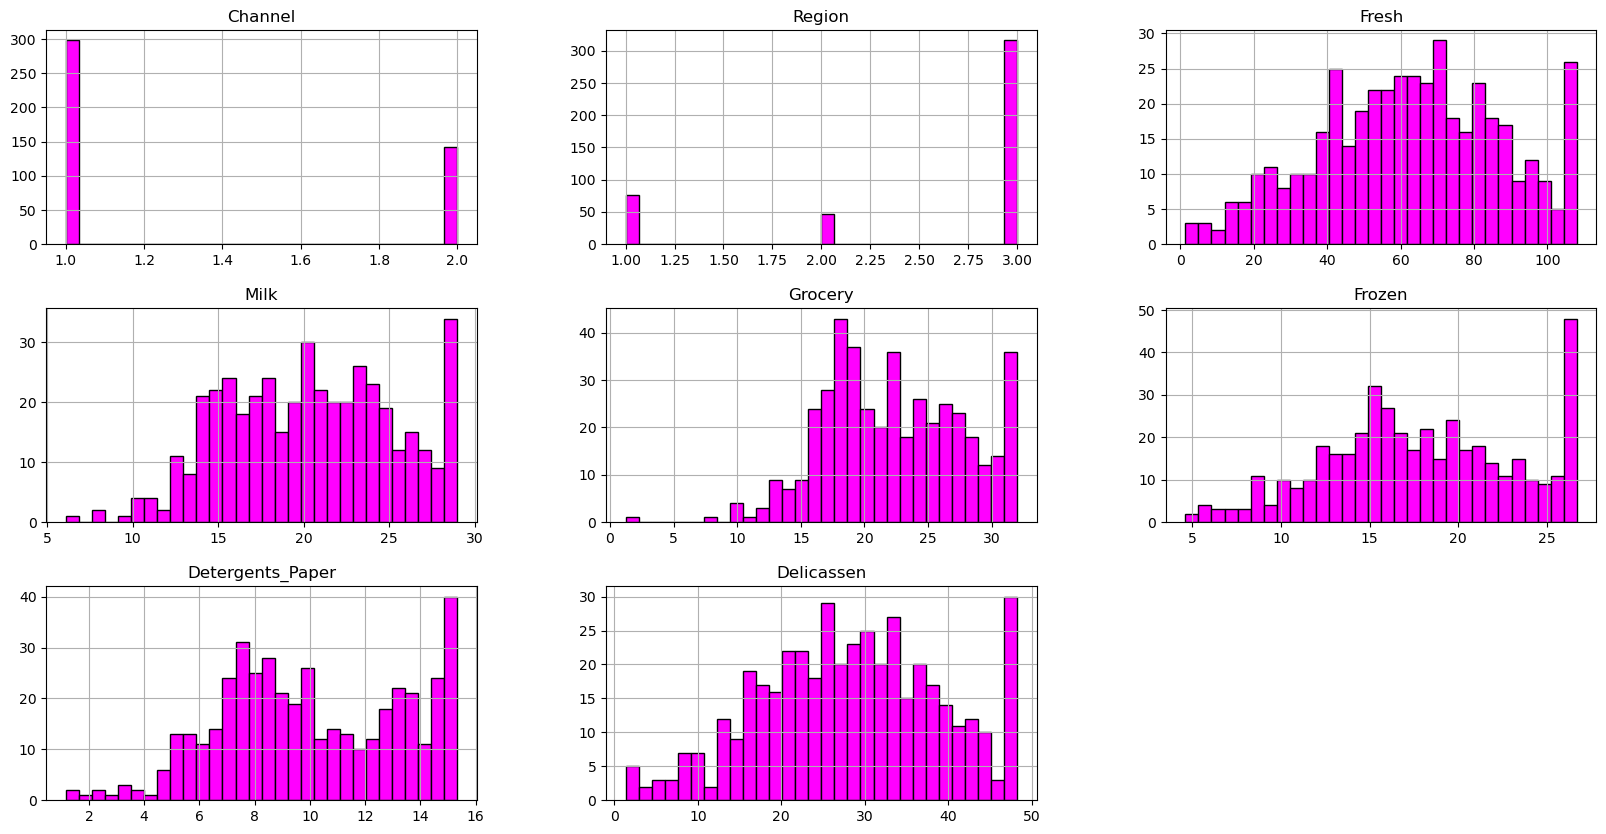

In [526]:
#Now the data looks more like a normal distribution

data.hist(figsize=(20,10),bins=30, color='magenta', edgecolor='black')
plt.show() 
   

In [527]:
# Reconfirm outliers

def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in dataset.columns:
    outliers = detect_outliers(dataset, column)
    print(f'Number of outliers in {column}: {len(outliers)}')   

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0


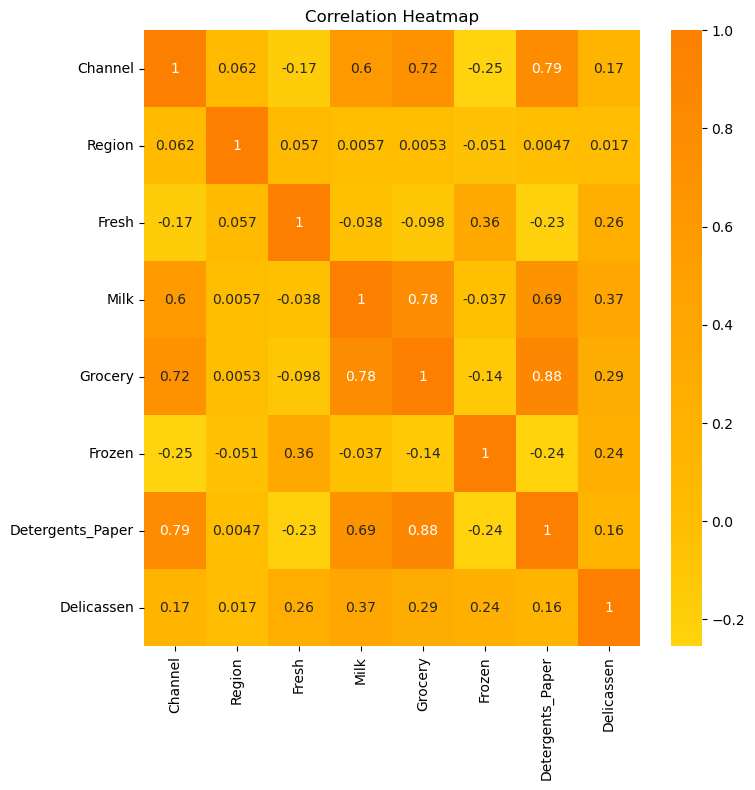

In [528]:
# Heatmap for correlation between variables
plt.figure(figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='Wistia', center=0)
plt.title('Correlation Heatmap')
plt.show()         

# How do our samples compare?
Customers who buy grocery are most likely to buy detergents_paper given the correlation between the two items. A similar observation was noted for grocery and milk as well as detergents_paper and milk. Channel feature correlated with the amount of detergents_paper procured.

# Scale the data 
As discussed previously, the scale of the variables matters for K-Means which is a distance-based algorithm. KMeans performs the analysis on the same scale between variables and therefore unscaled data will lead to biased learning. 


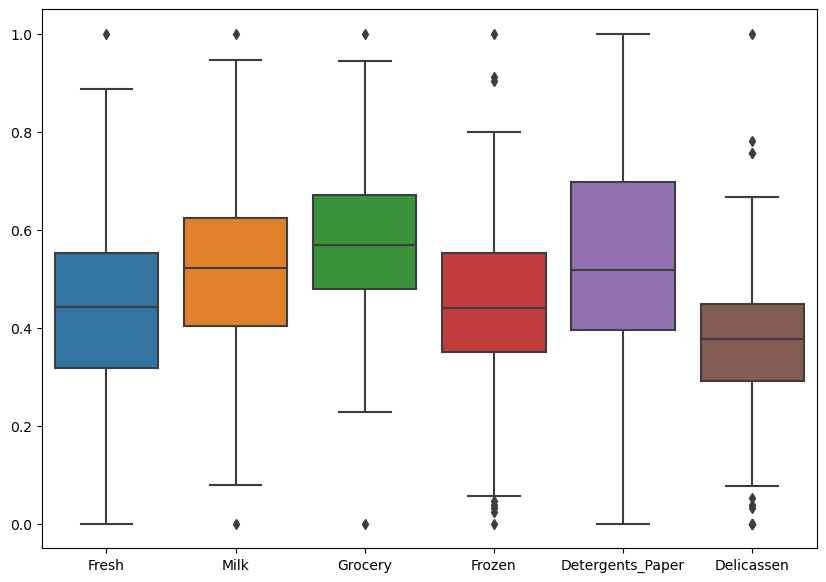

In [467]:
norm=data.iloc[:,2:] #Numerical data

scaler=MinMaxScaler()
columns=data.columns[2:]
norm=scaler.fit_transform(data.iloc[:,2:]) #Only numeric variables
norm=pd.DataFrame(norm, columns=columns)

plt.figure(figsize=(10,7))
sns.boxplot(data=norm)
plt.show()  



In [529]:
#Removal of outliers
for i in norm.columns:
    iqr=np.percentile(norm[i], 75)-np.percentile(norm[i], 25)
    per75=np.percentile(norm[i], 75)
    per25=np.percentile(norm[i], 25)
    norm[i]=np.where(norm[i]>per75+1.5*iqr, per75+1.5*iqr,norm[i] )
    norm[i]=np.where(norm[i]<per25-1.5*iqr, per25-1.5*iqr,norm[i] )  

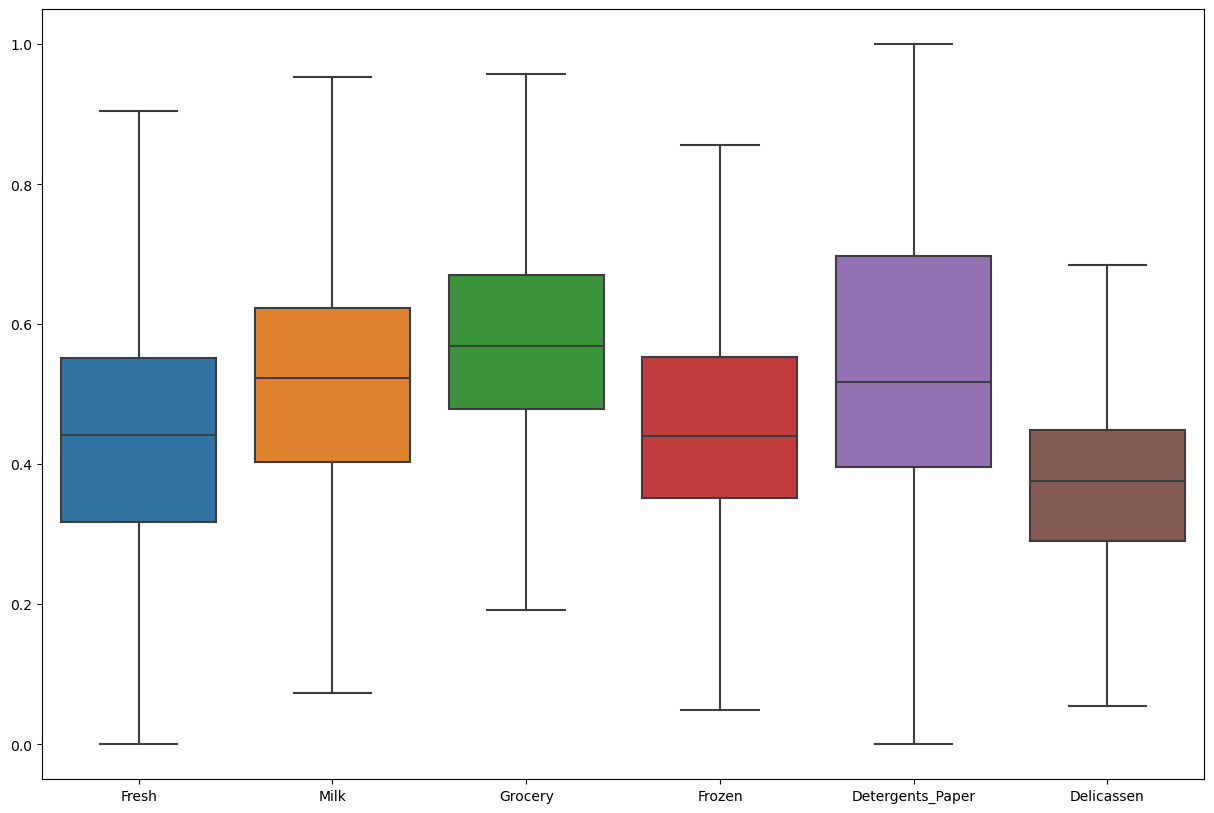

No more outliers in the scaled dataset


In [530]:
#Check for pending outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=norm)
plt.show() 
print("No more outliers in the scaled dataset")  

In [531]:
#Let's test for normality using Shapiro Wilks test. The null hypothesis is that the data is normal.
normality=pd.DataFrame(index=['p-value', 'test-statistic'])
for i in norm.columns:
    normality[i]=shapiro(norm[i])
    
normality.T      

,p-value,test-statistic
Fresh,0.997202,0.662730
Milk,0.996520,0.459561
Grocery,0.992466,0.025724
Frozen,0.995659,0.264255
Detergents_Paper,0.985208,0.000185
Delicassen,0.992554,0.027444


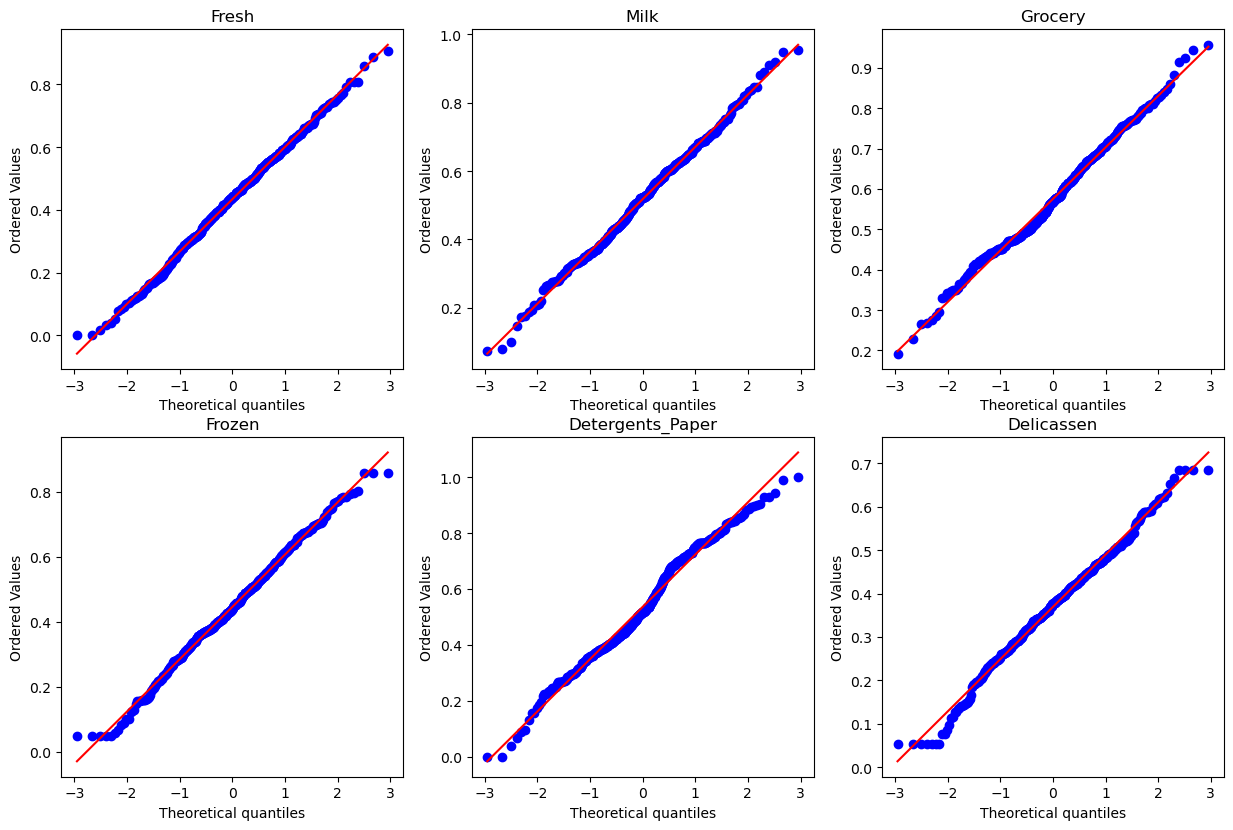

In [532]:
#Let's visualize the normality using quantilt quantile (QQ) plot
plt.figure(figsize=(15,15))
for i,var in enumerate(norm.columns):
    plt.subplot(3,3,i+1)
    probplot(norm[var], plot=plt)
    plt.title(f'{var}')
plt.show()      

The dataset is now normally distributed. 

In [533]:
#Let's recode Region and Channel. Reason: Kmeans algorithm may not be stable while working on a mix of 
#categorical and numeric variales. We will use One Hot Encoding to recode the categorical variables

data=pd.get_dummies(data=dataset, columns= ['Region','Channel'], drop_first=True)

#Uniting our categorical dummified variables with numerical normalized data.

data.iloc[:,:6]=norm   


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

How many clusters should the model use? We will look into this using "elbow method". We will estimate Within Sum of Squares (WSS) of the distances inside the cluster. The aim is find the number of clusters which gives the lowest WSS. We will examine a max. cluster of 10 and min. of 2. 

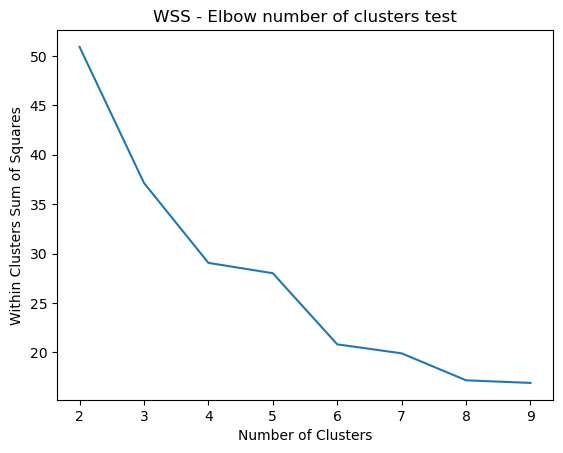

In [534]:
from sklearn.cluster import KMeans


# Calculate WCSS for different number of clusters
elbow_results = []
for i in range(2,10):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, data, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)
# Plot the WCSS values
plt.plot(range(2,len(elbow_results)+2) , elbow_results)
plt.title('WSS - Elbow number of clusters test')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()   

Plotting the elbow we can see that it's formed at value 4 on the X-axis. It means that having 4 clusters should obtain the greatest proportional change in minimizing the WSS. We can also use 6 clusters?

In [535]:
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

# Build the model
kmeans=KMeans(init='k-means++' , n_clusters=3, random_state=0)

cluster_model=kmeans.fit(data)


dataset['clusters']=cluster_model.predict(data).astype('str')

data['clusters']=dataset['clusters']  

Let's visualize the clusters via pairs of variables. Before doing this, we need to reduce the dimensionality , so we will deploy Principal Components Analysis (PCA). First Let´s determine the best number of components to use in order to capture at least 90% of the variability of the data

In [536]:
pca=PCA(n_components=len(data.columns)-1)

pca.fit(data.iloc[:,:-1])

pca.explained_variance_ratio_   

array([0.39804722, 0.36827827, 0.08376414, 0.05943256, 0.0361975 ,
       0.02340303, 0.01591205, 0.01056671, 0.00439852])

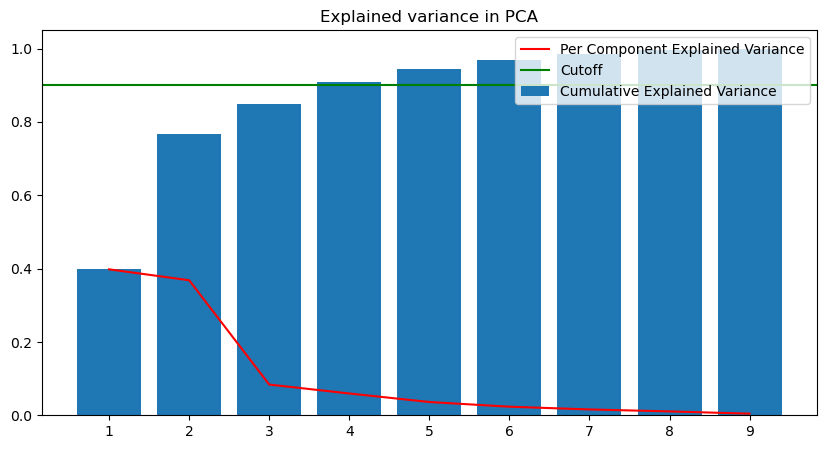

In [537]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,10), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=1)
plt.show()
 

We can see that 90% of explained variability reached when we use 4 components. As such, we will implement dimensionality reduction to 4 components

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


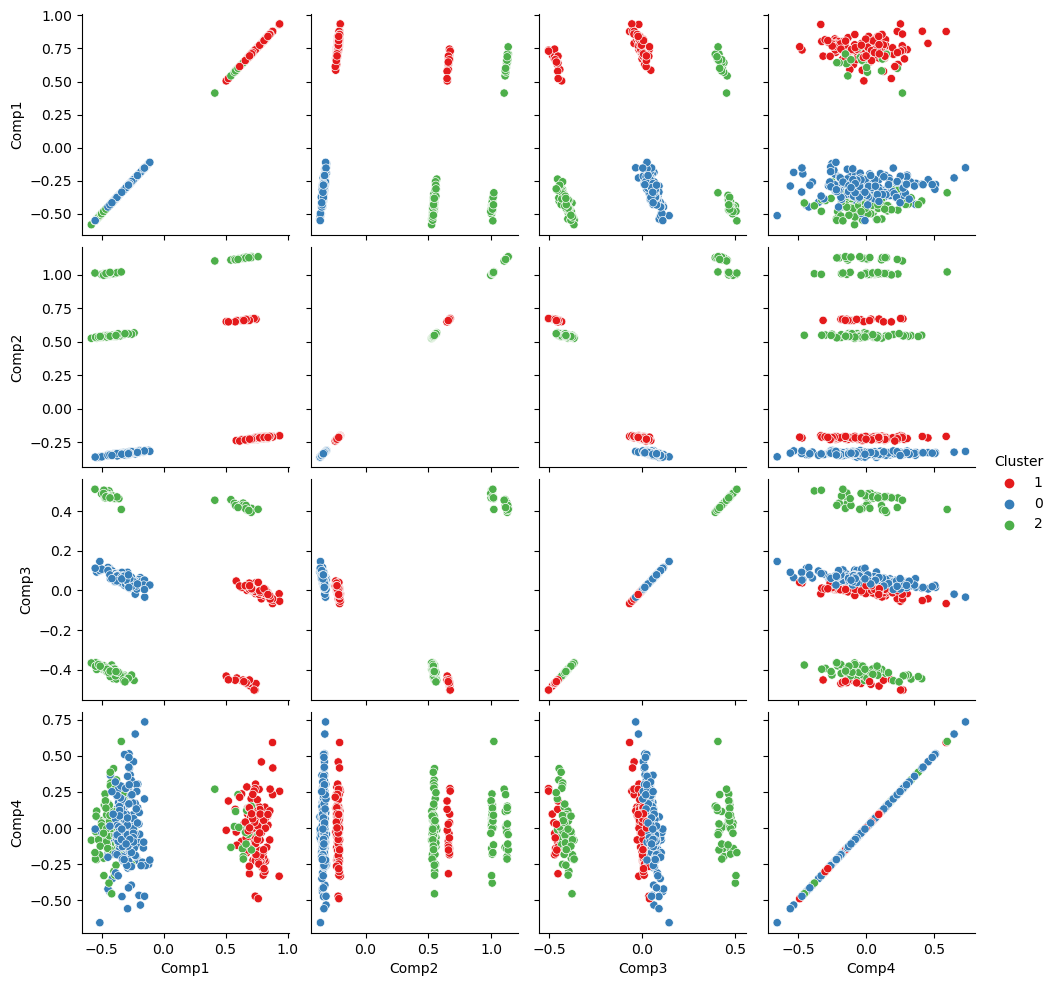

In [539]:
pca=PCA(n_components=4)
reduced=pca.fit_transform(data.iloc[:,:-1])

reduced=pd.DataFrame(np.column_stack([reduced, data.clusters]), columns=['Comp1','Comp2','Comp3','Comp4','Cluster'])

sns.pairplot(reduced, hue='Cluster', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()     


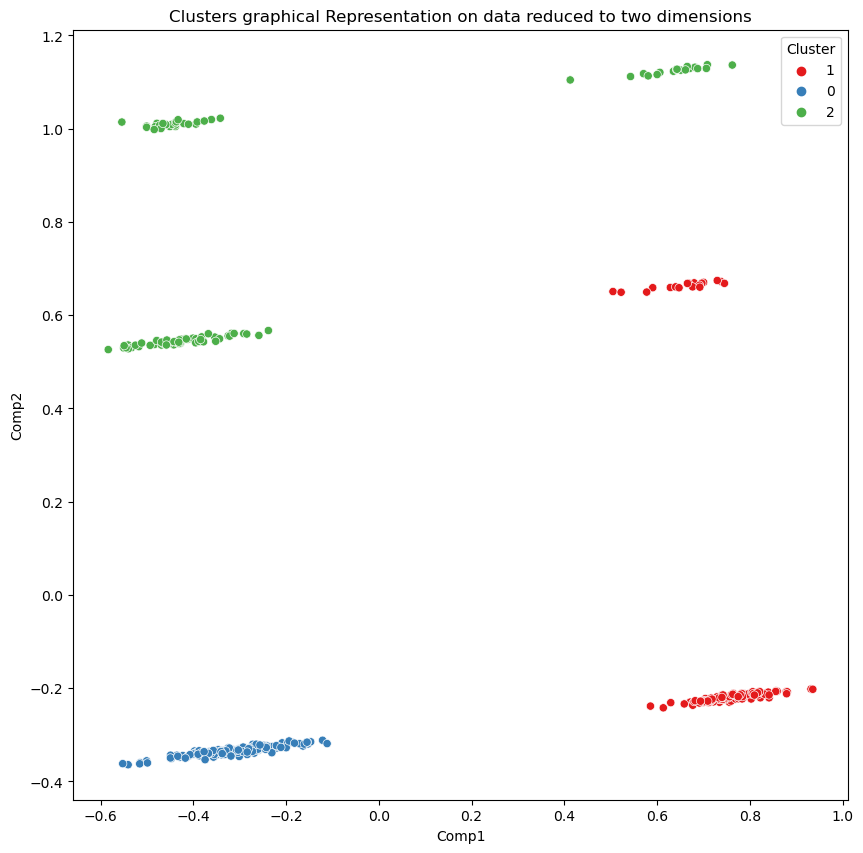

In [541]:
#let's reduce n-component to 2 to better understand the clusters
pca=PCA(n_components=2)
reduced=pca.fit_transform(data.iloc[:,:-1])
reduced=pd.DataFrame(np.column_stack([reduced, dataset.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced, hue='Cluster', x='Comp1',y='Comp2', palette='Set1')
plt.title('Clusters graphical Representation on data reduced to two dimensions',  fontsize=12)
plt.show()  

Still not looking perfect. Let´s see the means of the original numerical variable values for different clusters. Maybe we should have chosen six clusters?

<Figure size 1000x1000 with 0 Axes>

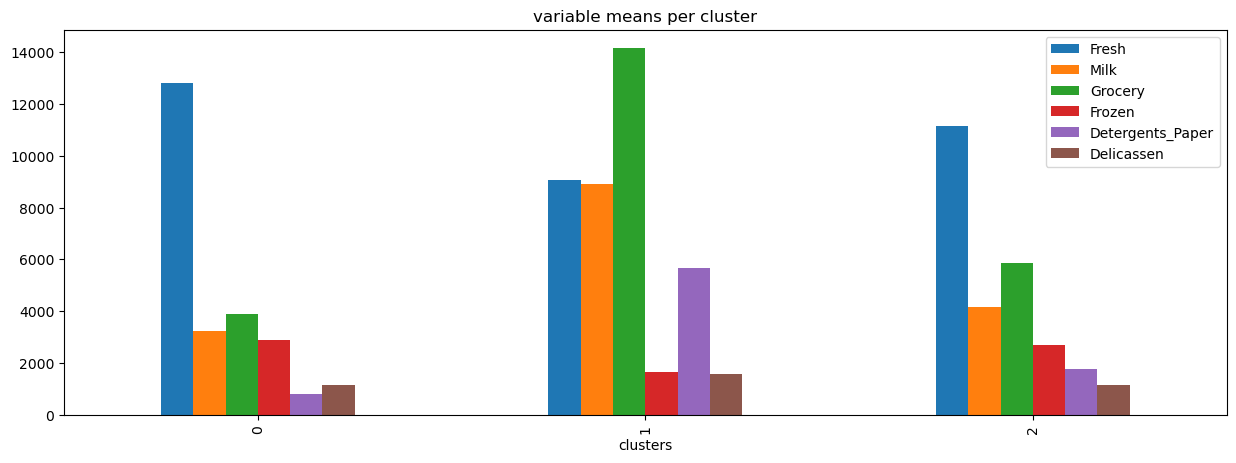

In [542]:
means=dataset.iloc[:,2:].groupby('clusters').mean()


plt.figure(figsize=(10,10))
means.groupby('clusters').mean().plot(kind='bar', figsize=(15,5))
plt.title('variable means per cluster')
plt.show() 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [543]:
hierarchy=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances=True)

dataset['Hierarchical_clusters']=hierarchy.fit_predict(data)       

In [544]:
reduced2=pd.DataFrame(np.column_stack([reduced, dataset['Hierarchical_clusters']]), columns=['Comp1','Comp2','Cluster_K_Means','Hierarchical_Clusters'])      

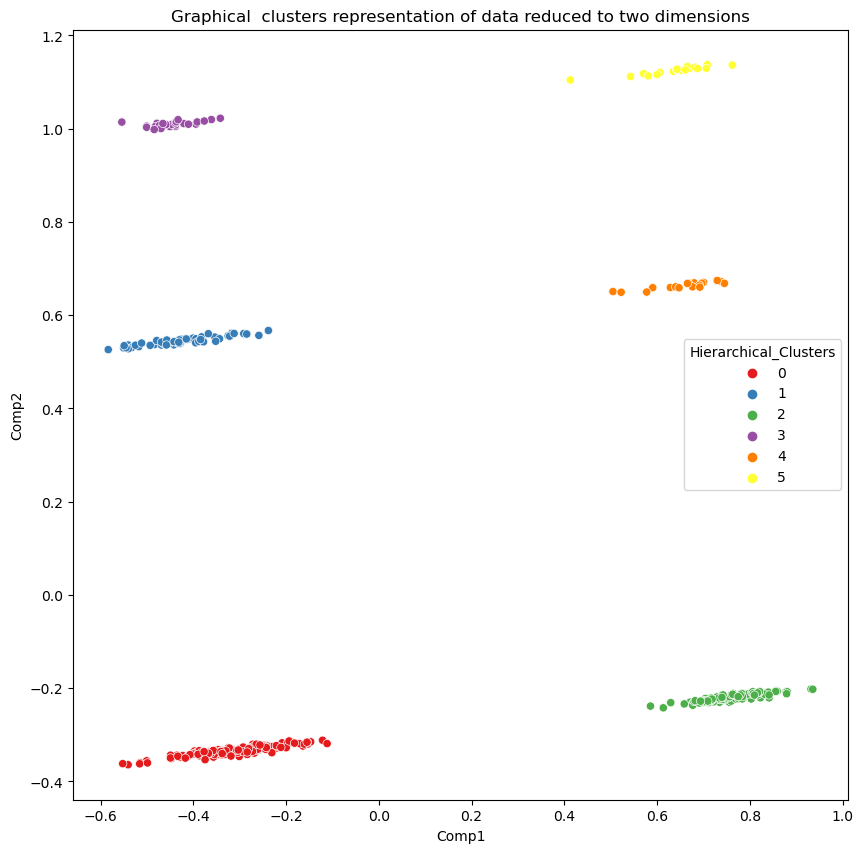

In [545]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced2, hue='Hierarchical_Clusters', x='Comp1',y='Comp2', palette='Set1')
plt.title('Graphical  clusters representation of data reduced to two dimensions',  fontsize=12)
plt.show()
       

The clusters are now formed adequately. To see the options in forming clusters, or how the observations will be divided with more or less clusters, we can plot the dendrogram, even before running the Hierarchical clusterization algorithm that assigns the clusters. 

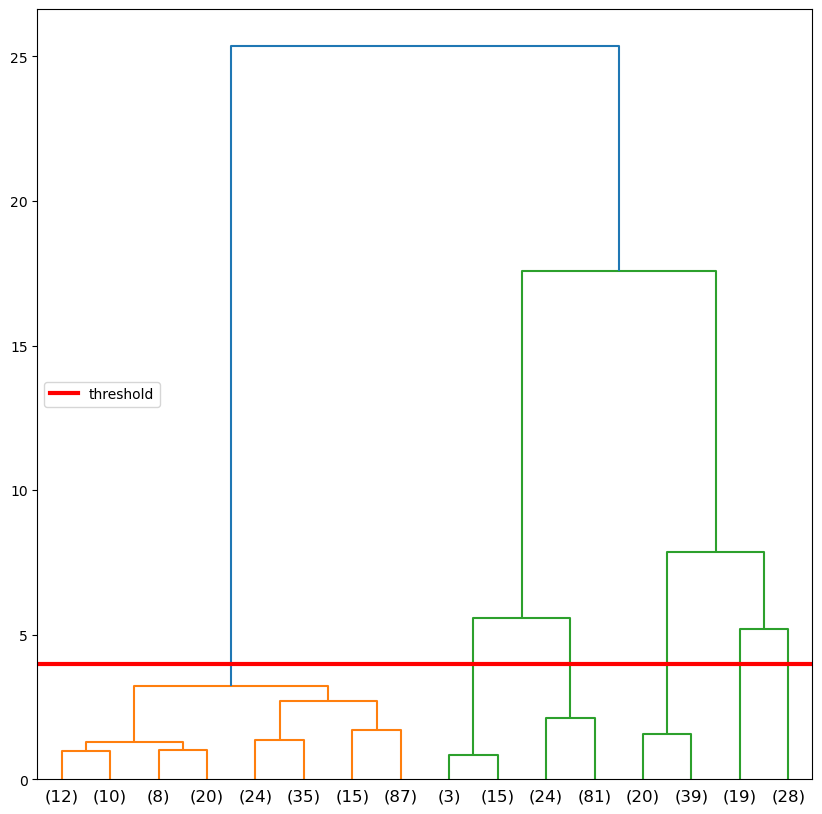

In [548]:
plt.figure(figsize=(10,10))
dendrogram(linkage(data ,method='ward'), truncate_mode='level', p=3 )
plt.axhline(y=4, label='threshold', color='red', lw=3)
plt.title='Dendrogram'
plt.legend(loc=6)
plt.show()                

To understand the dendrogram, the red line was added to depict a situation when we want 6 clusters, exactly what we received with the algorithm we ran. There are 6 vertical lines crossing the horizontal red line. These vertical lines denote the 6 clusters formed. The numbers in parenthesis are numbers of observations.You can see that some clusters are not subdivided on the plot we see (since i limited the subdivisions shown to a depth of 3 for better understanding) but of course they have hidden subdivisions. Therefore we have clusters that have 59,28,19,18 observations. Two additional clusters have further subdivisions on the view - so to calculate their number of observations we have to sum (22+28+59+102) and (65+9+3+11+11+34+5+31). We can compare these results to cluster counts as following:

In [549]:
#Number of observations per Cluster
print(reduced2.Hierarchical_Clusters.value_counts()) 

Hierarchical_Clusters
0    211
2    105
1     59
3     28
5     19
4     18
Name: count, dtype: int64


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [556]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numericdatacols = dataset.iloc[ : , 2 : ]

numcolumns = list(numericdatacols.columns)

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(dataset[numcolumns])

# Transform log_samples using the PCA fit above
pca = pca.fit_transform(dataset[numcolumns])  

<Axes: >

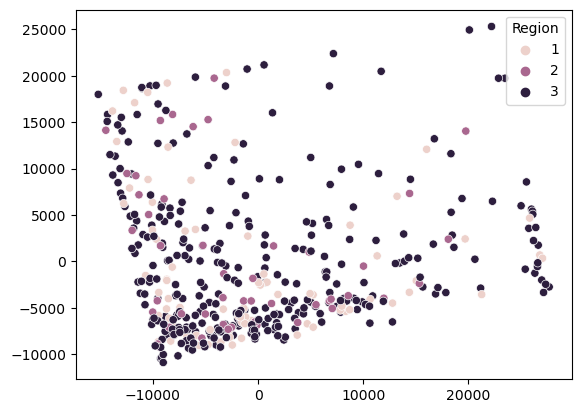

In [557]:
sns.scatterplot(x = pca[ :, 0],y = pca[ : ,1],hue = dataset["Region"]) 

<Axes: >

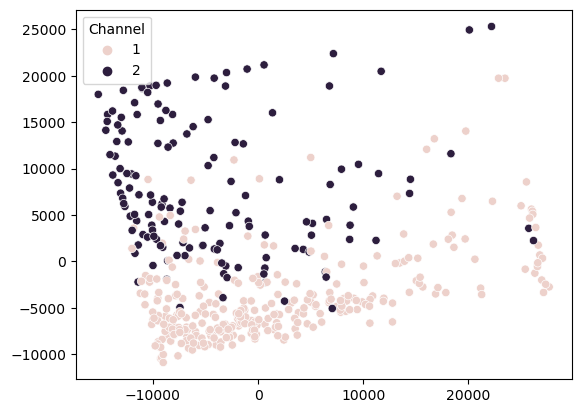

In [559]:
sns.scatterplot(x = pca[ :, 0],y = pca[ : ,1],hue = dataset["Channel"])  

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

This notebook presented Kmeans, heirarchical and PCA algorithms to show six clusters. Clustering can be used in business environment for discovering patterns, segmentation for marketing and CRM reasons and more.